In [1]:
import pandas as pd
import seaborn as sns
import os
import wrangle_zillow as w
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from env import get_connection

# Wrangle

In [2]:
df = w.acquire_zillow()
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [3]:
df = df.rename(columns={'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms',
                            'calculatedfinishedsquarefeet': 'square_ft', 
                            'taxvaluedollarcnt': 'tax_value', 'yearbuilt': 'year',
                            'taxamount':'tax_amount', 'fips': 'county', 'propertylandusetypeid': 'property_type',
                            'transactiondate': 'transaction_date'})

In [4]:
df['county'] = df['county'].map({6037: 'Los Angeles', 6059: 'Orange', 6111: 'Ventura'})

In [5]:
df = w.handle_missing_values(df, .60, .75)

In [6]:
train, val, test = w.split_data(df)
train.shape, val.shape, test.shape

((29254, 34), (12538, 34), (10449, 34))

# Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

H0: There is no difference in logerror based off county
    
Ha: There is a difference in logerror based off county

In [7]:
train.columns

Index(['id', 'parcelid', 'bathrooms', 'bedrooms', 'buildingqualitytypeid',
       'calculatedbathnbr', 'square_ft', 'finishedsquarefeet12', 'county',
       'fullbathcnt', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode', 'property_type',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'year',
       'structuretaxvaluedollarcnt', 'tax_value', 'assessmentyear',
       'landtaxvaluedollarcnt', 'tax_amount', 'censustractandblock',
       'logerror', 'transaction_date', 'heatingorsystemdesc',
       'propertylandusedesc'],
      dtype='object')

In [10]:
# narrow down my features to what I want to explore on
numericals = ['logerror', 'year', 'square_ft', 'bedrooms']
categoricals = ['county' ]
explore_cols = numericals + categoricals

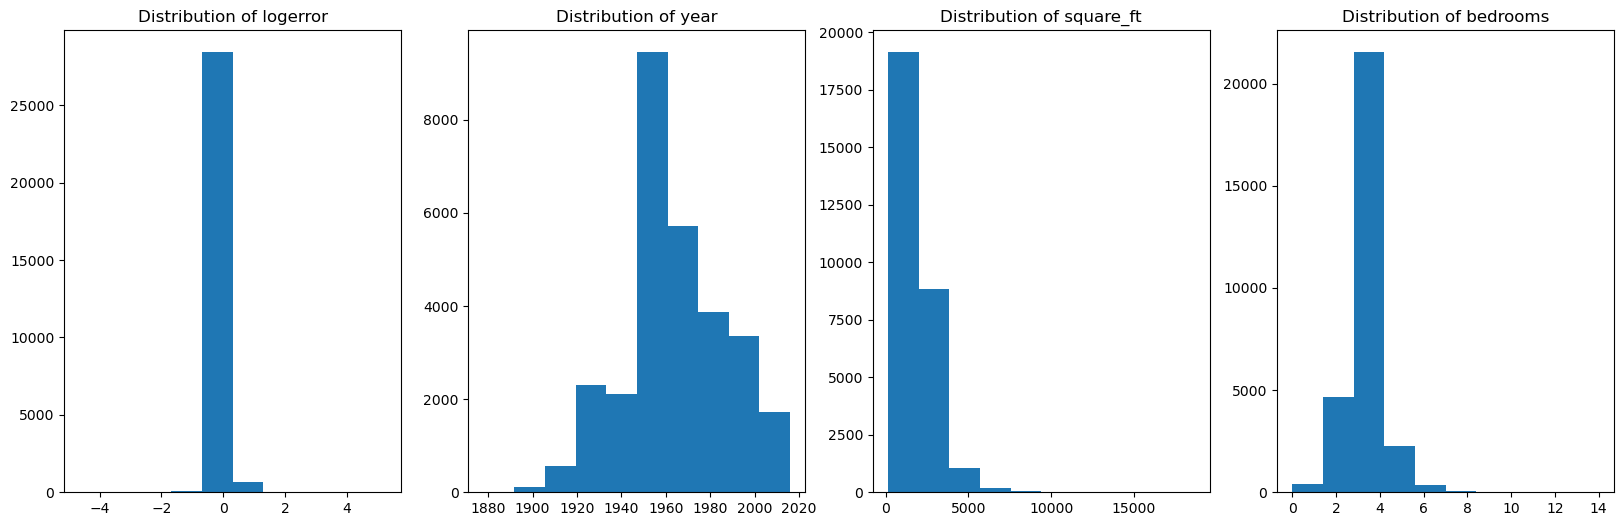

In [11]:
fig, axs = plt.subplots(1,4, figsize=(20,6))
for col, ax in zip(numericals, axs):
    ax.hist(train[col])
    ax.set_title(f'Distribution of {col}')
plt.show()

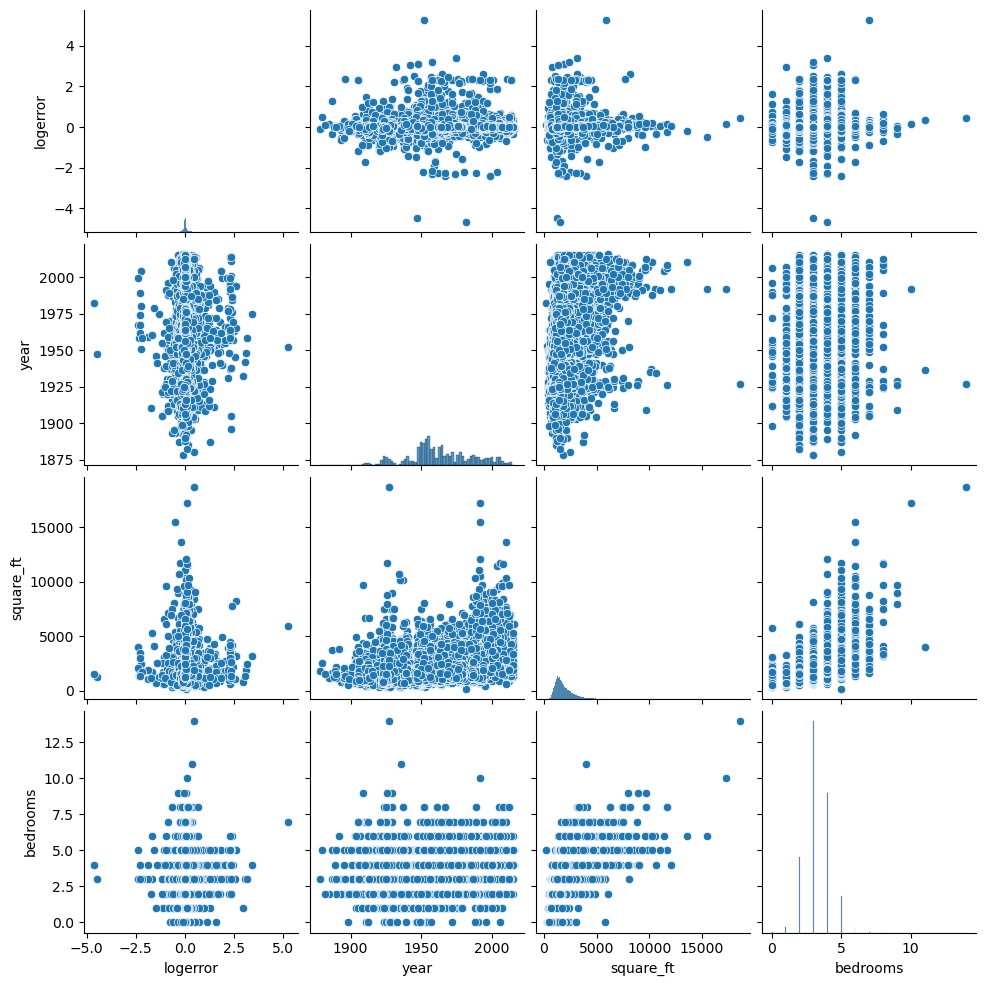

In [12]:
# lets use pairplot to get that birds-eye view of what is going
# on with the present data set
sns.pairplot(data=train[explore_cols])

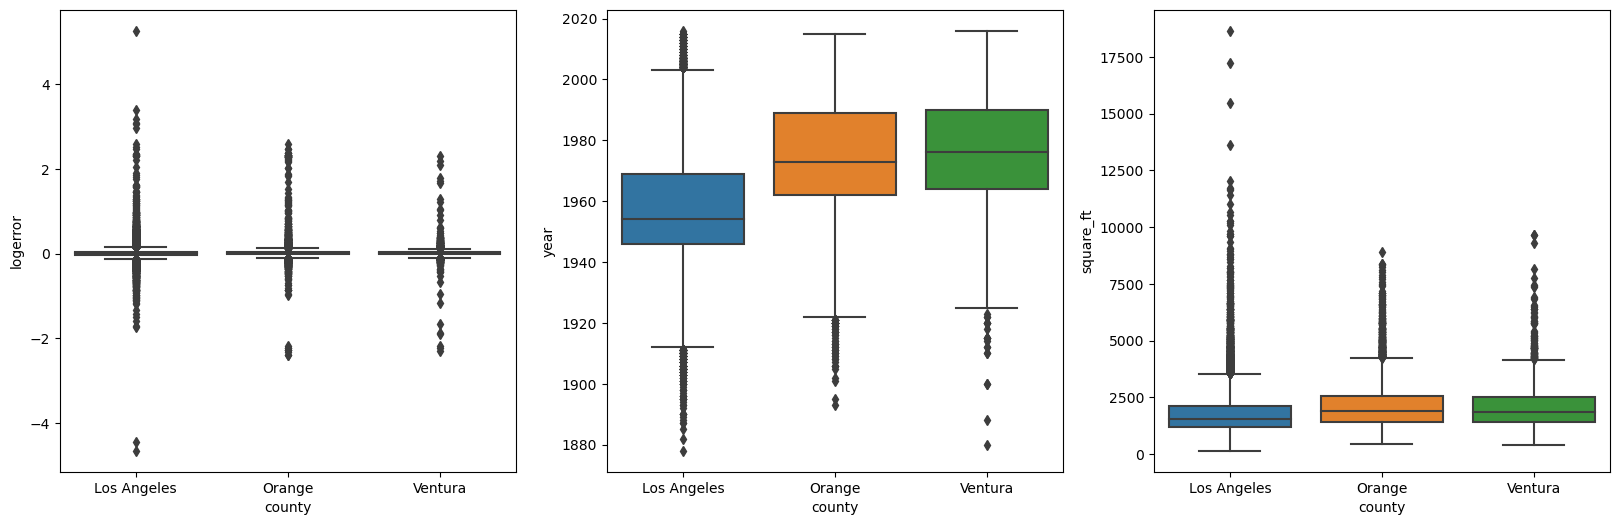

In [14]:
fig, axs = plt.subplots(1,3,figsize=(20,6))
for col, ax in zip(numericals, axs):
    sns.boxplot(data=train, x='county', y=col, ax=ax)
plt.show()

<Axes: xlabel='county', ylabel='logerror'>

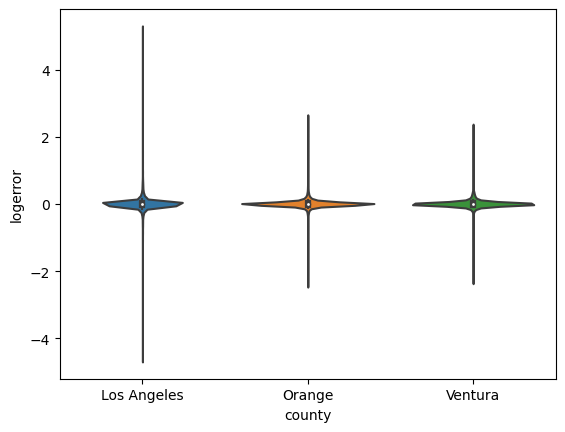

In [16]:
sns.violinplot(data = train, x = 'county', y = 'logerror')